# Unsupervised Learning

In diesem Lernabschnitt befassen wir uns mit einem kleinen Datenset über Einkaufszentrumskunden, die nach ihrem Einkaufs- und Ausgabeverhalten bewertet und eingestuft werden. Im ersten Schritt visualisieren wir den Datensatz. Um verschiedene Gruppen von Einkaufszentrumskunden zu identifizieren, schauen wir uns zwei der grundlegenden Clustering-Algorithmen an: <mark>**K-Means**</mark> und <mark>**DBSCAN**</mark>.

In [2]:
from IPython.display import Image

### Import von Bibliotheken und Daten

Zuerst importieren wir die Bibliotheken, die wir in diesem Lernabschnitt verwenden werden.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

Mit Hilfe der Bibliothek <code>pandas</code>, die Sie bereits kennen gelernt haben, werden die Daten geladen:

In [3]:
df = pd.read_csv("mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Daten Exploration

Um fehlerhafte oder unvollständige Daten erkennen zu können, nutzen wir die Funktion <code>info()</code>.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



Unnötige Spalten werden entfernt und die Spaltenbezeichnungen Jahreseinkommen und Ausgabenbewertung werden gekürzt:

In [5]:
df = df.drop('CustomerID', axis=1)
df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Jede Spalte repräsentiert einen relevanten Aspekt des Kunden. Die Beziehung zwischen den einzelnen Kundenaspekten können wir über die Bibliothek <code>seaborn</code> visualisieren. Hier eignet sich die Funktion <code>pairplot</code>, die ein Diagramm für jedes numerische Attributpaar erstellt:

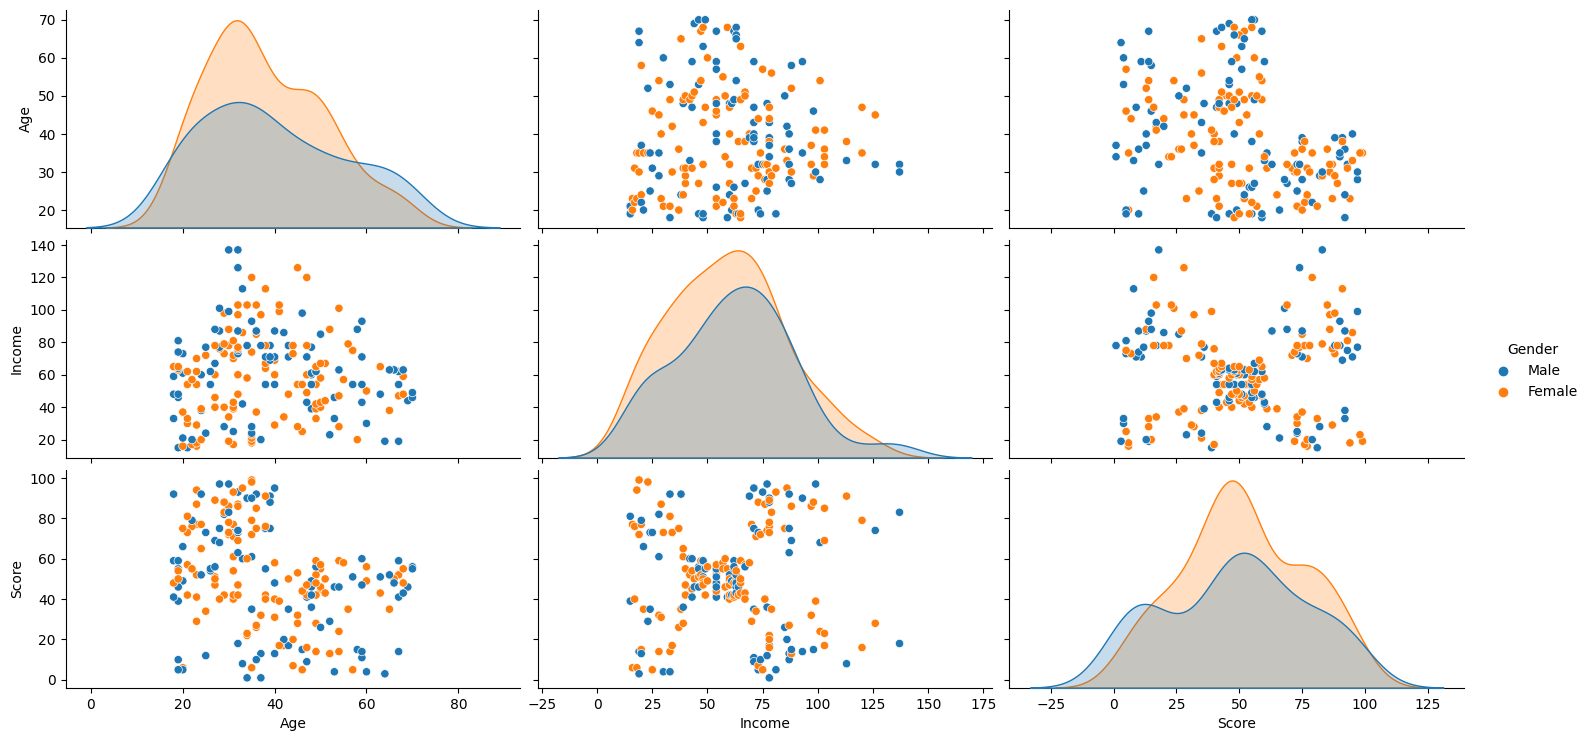

In [8]:
sns.pairplot(df, hue='Gender', aspect=2)
plt.show()

Das Argument "hue" wendet die Farbe auf die Datenpunkte an, die der Spalte "Gender" entsprechen. Mit Hilfe des Arguments "aspect" wird das Seitenverhältnis der Diagramme festgelegt. 

Wir entfernen die Spalte "Gender" aus dem Datenset, da es sich nicht um numerische Werte handelt und wir sie für die Clustering-Algorithmen nicht mehr verwenden. Nun weisen wir den Dataframe der Variablen X zu:

In [7]:
X = df.drop(['Gender'], axis=1)

## Clustering Alogrithmen

Nun kommen wir zum spannenden Teil des Lernabschnitts. Wir nutzen verschiedene Algorithmen um ähnliche Datenpunkte in Gruppen zusammenzufassen. 

### K-Means

Mit Hilfe der Zielzahl "k" wird die Anzahl der Zentroide festgelegt, die man im Datensatz finden möchte. Ein Zentroid repräsentiert das Zentrum eines Clusters. Zuerst werden k Datenpunkte zufällig aus allen verfügbaren Datenpunkten gezogen und als vorläufige Zentroide zugewiesen. Im nächsten Schritt ordnet der Algorithmus jeden der verbleibenden Datenpunkte einem der Cluster zu, ausgehend vom nächstgelegenen Zentroid. Anschließend werden die Zentroide neu berechnet, so dass sie die tatsächlichen Zentren der aktuellen Cluster darstellen. Die Zuweisung von Datenpunkten zu Clustern und der anschließenden Neuberechnung der Zentroide wird so lange wiederholt, bis die Lage der Zentroide final bestimmt ist. An diesem Punkt gelten die Zentroide als konvergiert und der Algorithmus wird beendet.

Mit der Bibliothek <code>sklearn</code> lässt sich die Funktion KMeans wie folgt anwenden:

In [9]:
km3 = KMeans(n_clusters=3).fit(X)
print(km3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/Users/roman/Repositorys/data-scince-course/data-science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Die obige Liste gibt an, welchem der 3 Cluster jeder Datenpunkt zugeordnet wurde. Um unsere Ergebnisse zu visualisieren, müssen wir zunächst die Clusterzuordnung zu unseren Daten <code>X</code> als zusätzliche Spalte hinzufügen. Um die Datenpunkte entsprechend ihrer Clusterzuordnung einzufärben, verwenden wir wieder das <code>hue</code> Argument, wie wir es zuvor zur Unterscheidung der Geschlechter getan haben. In einem zweidimensionalen Diagramm, also müssen wir **Age**, **Income** und **Score** wählen. Hier verwenden wir nur **Income** und **Score**:

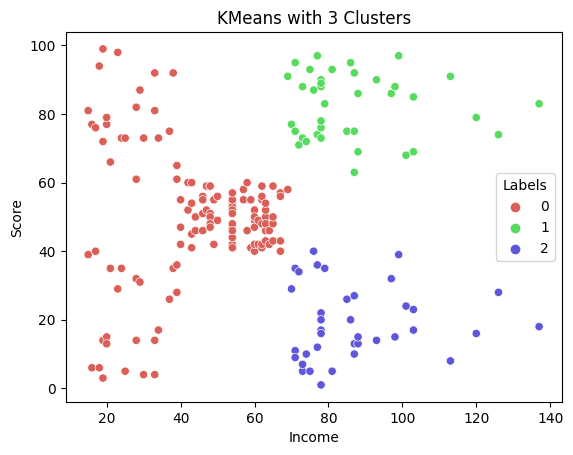

In [10]:
X['Labels'] = km3.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

Unser Algorithmus funktioniert und die Clusterzuordnungen scheinen plausibel zu sein. Wenn man sich jedoch die Verteilung der Punkte ansieht, sollte es 5 statt 3 Cluster geben.

<mark>**Aufgabe:**</mark> Wenden Sie nun K-means mit 5 Clustern an:

In [11]:
# Füge Sie hier Ihren Code ein.
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_

/Users/roman/Repositorys/data-scince-course/data-science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Eine andere Möglichkeit, die Daten zu visualisieren, ist die Verwendung mit Hilfe von <code>swarmplot</code>:

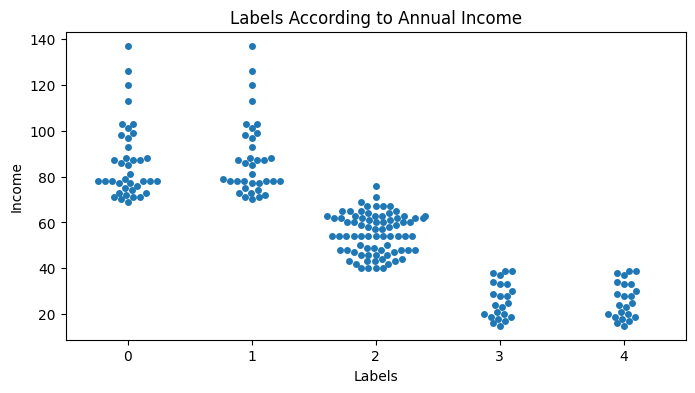

In [12]:
plt.figure(figsize=(8,4))
sns.swarmplot(x=X['Labels'], y=X['Income'])
plt.title("Labels According to Annual Income")
plt.show()

Aufgabe: Bauen Sie einen Swarmplot Score vs. Labels auf dem gleichen Datenset.

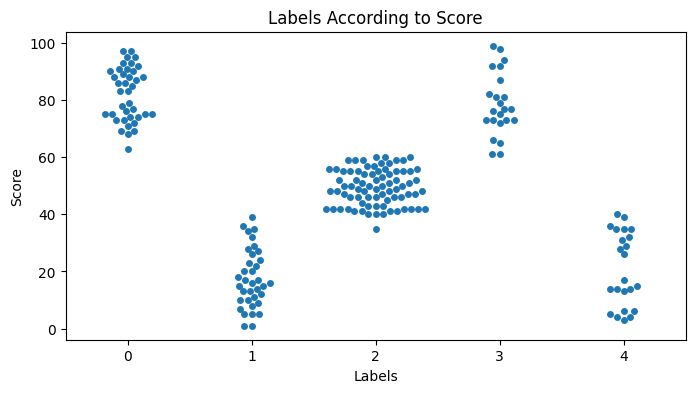

In [14]:
# Füge Sie hier Ihren Code ein.
plt.figure(figsize=(8,4))
sns.swarmplot(x=X['Labels'], y=X['Score'])
plt.title("Labels According to Score")
plt.show()

Da sich die Bestimmung der richtigen Anzahl an Clustern mit dem bloßen Auge bei steigender Spaltenanzahl als schwierig erweist, gibt es eine systematischere Methode zur Bestimmung von <code>k</code>.

Die <code>sklearn</code> -Implementierung des K-Means-Algorithmus liefert zusätzlich zu den Cluster-Labels auch die Summe der Distanzen von Datenpunkten zu ihren jeweiligen Zentroiden als <code>inertia_</code> (Trägheit). Damit kann eine Reihe verschiedener Werte für <code>k</code> ausprobiert und die Qualität jedes Ergebnisses mit diesem Trägheitsparameter bewertet werden:

/Users/roman/Repositorys/data-scince-course/data-science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/roman/Repositorys/data-scince-course/data-science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/roman/Repositorys/data-scince-course/data-science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/roman/Repositorys/data-scince-course/data-science/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will

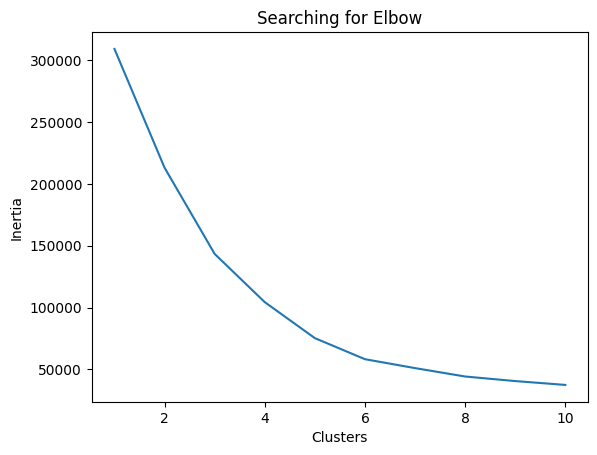

In [15]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
sns.lineplot(x=list(range(1, 11)), y=clusters)
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

Die Trägheit nimmt mit zunehmender Anzahl von Clustern kontinuierlich ab. Im Extremfall stellt jeder einzelne Datenpunkt einen Schwerpunkt dar und die Trägheit verschwindet, da jeder Punkt den Abstand 0 zu sich selbst hat. Wenn jedoch die Anzahl an Clustern der Anzahl an Datenpunkten entspricht, verfehlt das Clustering seinen Zweck.
Um eine geeignete Anzahl an Clustern zu wählen, hilft der sogenannte <Mark>**Ellenbogenpunkt**</mark>. Dieser lässt sich im Diagramm visuell ablesen und die Anzahl der Cluster zu bestimmen.

### DBSCAN

Eine weitere Clustering-Methode stellt DBSCAN dar. DBSCAN steht für "Density-Based Spatial Clustering of Applications with Noise". Diese Technik ist einer der gängigsten Clustering-Algorithmen, die auf der Dichte von Objekten basieren. Es gibt bestimmte Geometrien der Datenpunktverteilung, die DBSCAN erfolgreich verarbeiten kann, wo K-Means versagt:

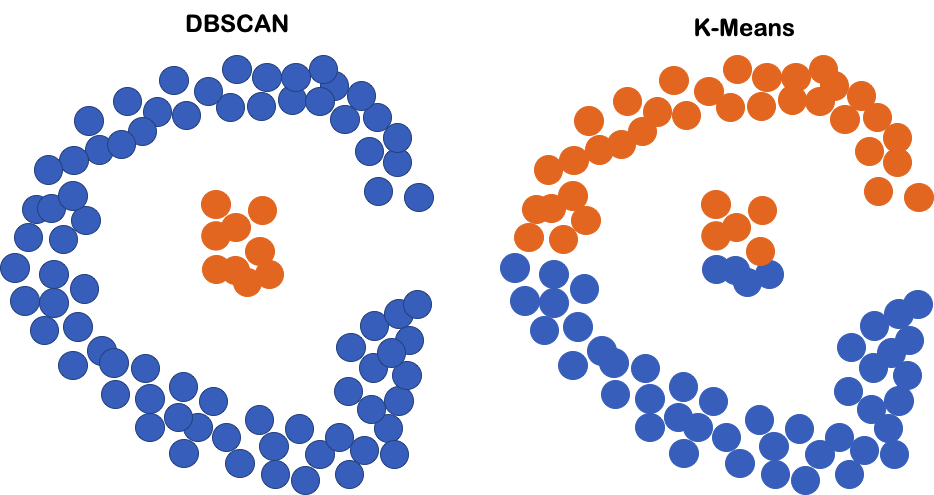

In [16]:
Image("DBSCAN_vs_KMeans.png")

DBSCAN geht davon aus, dass ein Punkt, der zu einem Cluster gehört, in der Nähe vieler anderer Punkte desselben Clusters liegen sollte. Daher identifiziert der Algorithmus zunächst sogenannte <mark>**Kernpunkte</mark>, die in der Nähe vieler anderer Punkte liegen, d. h. mindestens <code>min_samples</code>, also die Mindestanzahl an Nachbarn, die einen bestimmten Radius <code>eps</code> haben. Diese beiden Parameter repräsentieren die beiden wichtigsten Parameter, die für diesen Algorithmus eingestellt werden müssen.

Im zweiten Schritt wird ein Kernpunkt zufällig ausgewählt und einem Cluster zugewiesen. Alle anderen Punkte in seiner Nähe werden dann demselben Cluster hinzugefügt. Dann werden alle Punkte in der Nähe *dieser* Punkte hinzugefügt, und so weiter, bis keine weiteren Punkte in der Nähe gefunden werden können, die nicht bereits zum Cluster gehören. Damit ist unser erster Cluster abgeschlossen.

Der obige Vorgang wird dann für einen weiteren Kernpunkt wiederholt, der noch übrig ist, bis jeder Punkt, der einem Cluster zugeordnet werden kann, zugeordnet wurde. Jeder verbleibende Punkt wird als <mark>**Ausreißer</mark> betrachtet und erhält das Cluster-Label <code>-1</code>. 

Hier ist ein Beispielcode für <code>eps=6</code> und <code>min_samples=6</code>:

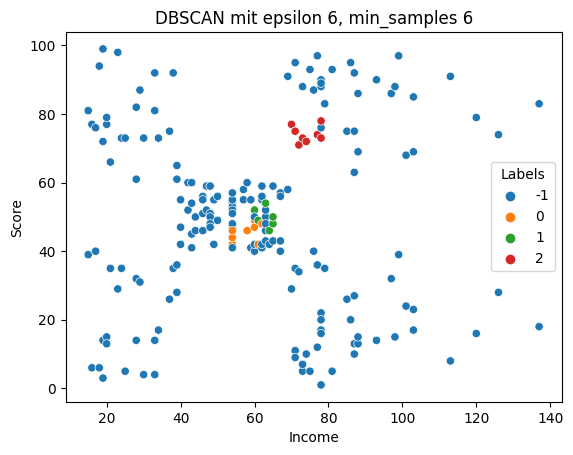

In [17]:
db = DBSCAN(eps=6, min_samples=6).fit(X)

X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN mit epsilon 6, min_samples 6')
plt.show()

Wie wir sehen können, sind die Parameter noch nicht sehr gut abgestimmt, da die meisten Punkte noch keinen Clustern zugeordnet wurden.

<mark>**Aufgabe:**</mark> Probieren Sie verschiedene Parameter für DBSCAN aus, bis Sie ein zufriedenstellendes Ergebnis erhalten. Hinweis: Selbst mit optimierten Parametern schneidet DBSCAN bei diesem speziellen Datensatz nicht so gut ab wie K-Means, da die Cluster recht unterschiedliche Dichten aufweisen.

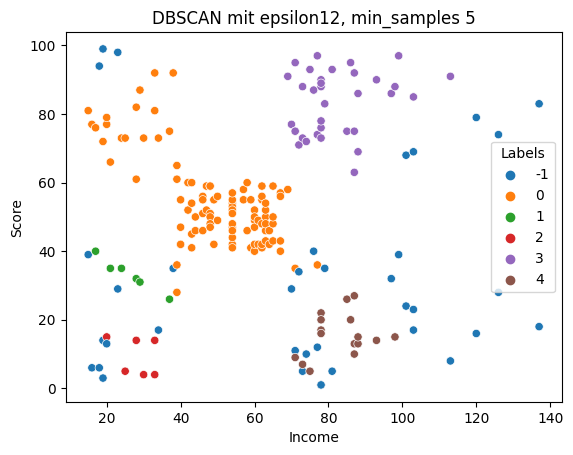

In [40]:
# Füge Sie hier Ihren Code ein.
eps = 12
min_sample = 5
db = DBSCAN(eps=eps, min_samples=min_sample).fit(X)

X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]))
plt.title(f"DBSCAN mit epsilon{eps}, min_samples {min_sample}")
plt.show()